<a href="https://colab.research.google.com/github/NabhyaIoT2026/Machine-Learning/blob/main/Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

Load the dataset


In [ ]:
data = pd.read_csv('weather.csv')

Target variable selection and binary classification based on median temperature

In [ ]:
target_column = 'weather__hourly__tempC'
data['temp_category'] = (data[target_column] >= data[target_column].median()).astype(int)

Drop unnecessary columns

In [ ]:
drop_columns = ['City', 'weather__hourly__UTCdate', 'weather__hourly__UTCtime', target_column]
data = data.drop(columns=drop_columns)

Handling categorical data and missing values if necessary

In [ ]:
data = pd.get_dummies(data, drop_first=True)

Splitting data into features and target

In [ ]:
X = data.drop(columns=['temp_category'])
y = data['temp_category']

Split data into training and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Feature scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Define models

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

Train and evaluate each model


Logistic Regression Accuracy: 0.96



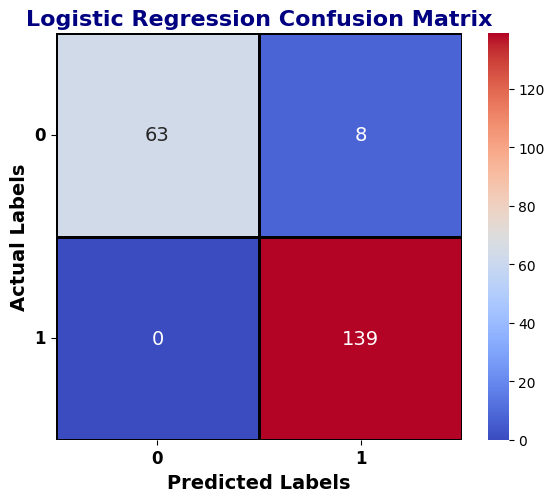


Decision Tree Accuracy: 1.00



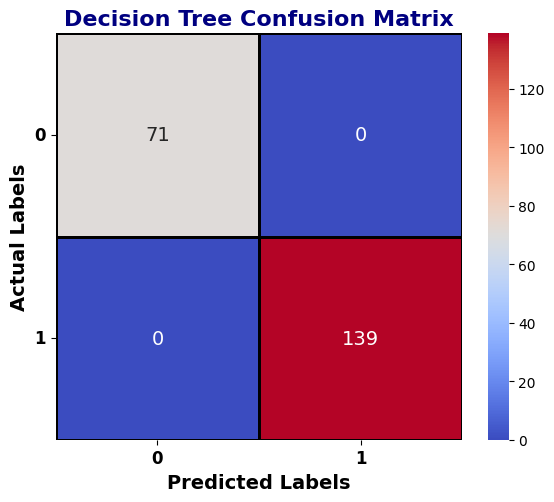


Random Forest Accuracy: 1.00



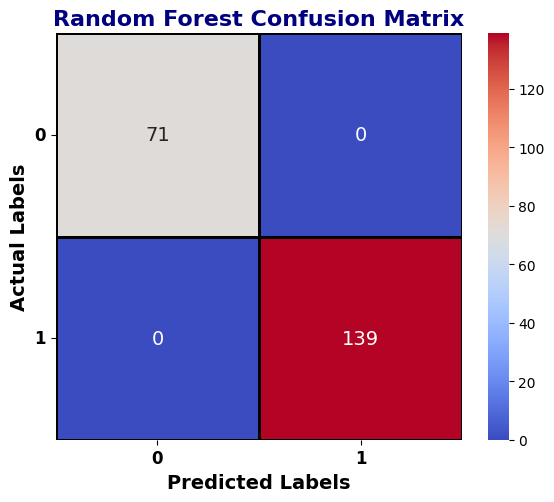


K-Nearest Neighbors Accuracy: 0.91



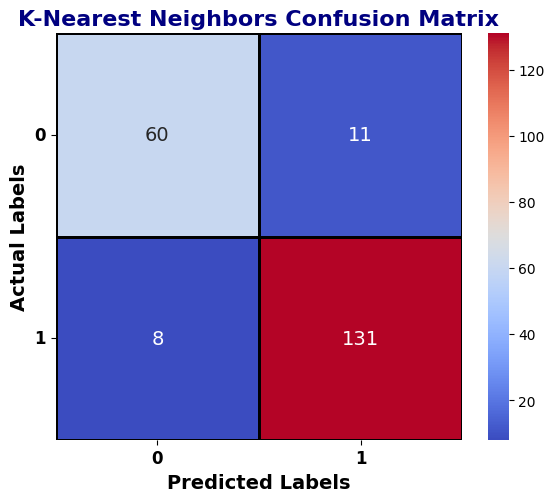

In [12]:
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Accuracy: {accuracy:.2f}\n")

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix with a more aesthetic style
    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm, annot=True, fmt="d", cmap="coolwarm", cbar=True,
        annot_kws={"size": 14}, linewidths=1, linecolor='black', square=True
    )

    # Title and labels with improved font settings
    plt.title(f"{model_name} Confusion Matrix", fontsize=16, weight='bold', color='navy')
    plt.xlabel("Predicted Labels", fontsize=14, weight='bold')
    plt.ylabel("Actual Labels", fontsize=14, weight='bold')

    # Adjust layout for readability
    plt.xticks(fontsize=12, weight='bold')
    plt.yticks(fontsize=12, weight='bold', rotation=0)
    plt.tight_layout()
    plt.show()

Define a figure for plotting the comparison graph

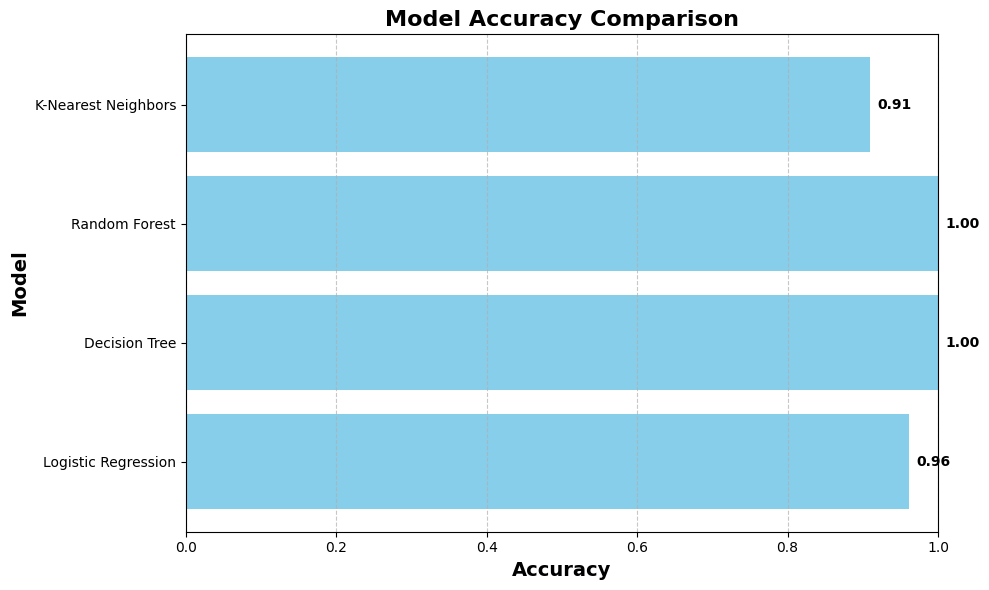

In [14]:
model_names = []
accuracies = []

# Calculate accuracy for each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Store the model name and accuracy
    model_names.append(model_name)
    accuracies.append(accuracy)

# Plot the accuracy of each model in a bar chart
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel("Accuracy", fontsize=14, weight='bold')
plt.ylabel("Model", fontsize=14, weight='bold')
plt.title("Model Accuracy Comparison", fontsize=16, weight='bold')
plt.xlim(0, 1)  # Set limit to make the accuracy range clearer (0 to 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display accuracy values on each bar
for index, value in enumerate(accuracies):
    plt.text(value + 0.01, index, f"{value:.2f}", va='center', fontweight='bold')

plt.tight_layout()
plt.show()